In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体（以SimHei为例）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号无法显示的问题

In [9]:
excel_file_path = '不打折分类数据.xlsx'

data_1 = pd.read_excel(excel_file_path, sheet_name=0)
data_2 = pd.read_excel(excel_file_path, sheet_name=1)
data_3 = pd.read_excel(excel_file_path, sheet_name=2)
data_4 = pd.read_excel(excel_file_path, sheet_name=3)
data_5 = pd.read_excel(excel_file_path, sheet_name=4)
data_6 = pd.read_excel(excel_file_path, sheet_name=5)

In [8]:
print(data_1.info())
print(data_2.info())
print(data_3.info())
print(data_4.info())
print(data_5.info())
print(data_6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52822 entries, 0 to 52821
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   销售日期        52822 non-null  datetime64[ns]
 1   分类名称        52822 non-null  object        
 2   销量(千克)      52822 non-null  float64       
 3   销售单价(元/千克)  52822 non-null  float64       
 4   批发价格(元/千克)  52822 non-null  float64       
 5   是否打折销售      52822 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 2.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315108 entries, 0 to 315107
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   销售日期        315108 non-null  datetime64[ns]
 1   分类名称        315108 non-null  object        
 2   销量(千克)      315108 non-null  float64       
 3   销售单价(元/千克)  315108 non-null  float64       
 4   批发价格(元/千克)  315108 non-

# 1. 水生根茎类 

In [28]:
data_1.describe()

,销量(千克),销售单价(元/千克),批发价格(元/千克),利润率
count,52822.000000,52822.000000,52822.000000,52822.000000
mean,0.699669,9.858796,6.592492,0.785485
std,0.565819,5.673332,3.643774,19.585574
min,0.050000,1.900000,0.010000,-0.608993
25%,0.376000,6.600000,4.600000,0.378830
50%,0.560000,8.000000,5.800000,0.456583
75%,0.980000,10.800000,7.170000,0.557895
max,17.000000,53.800000,38.780000,1599.000000


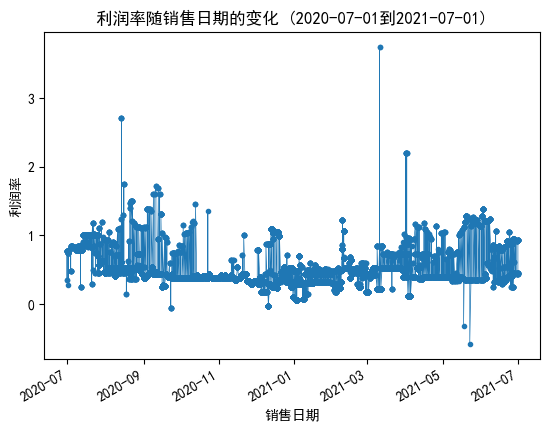

In [24]:
from datetime import datetime 

sales_dates = data_1['销售日期']
profit_rates = data_1['利润率']

# 将日期字符串转换为Timestamp对象
sales_dates = pd.to_datetime(sales_dates)

# 筛选出在2020-07-01到2021-07-01之间的数据点
filtered_sales_dates = []
filtered_profit_rates = []
for date, profit in zip(sales_dates, profit_rates):
    if datetime(2020, 7, 1) <= date <= datetime(2021, 7, 1):
        filtered_sales_dates.append(date)
        filtered_profit_rates.append(profit)

# 创建折线图并调整线条粗细
plt.plot(filtered_sales_dates, filtered_profit_rates, marker='o', linestyle='-', linewidth=0.5, markersize=3)  # 调整linewidth参数以改变线条粗细

# 添加标题和标签
plt.title('利润率随销售日期的变化 (2020-07-01到2021-07-01)')
plt.xlabel('销售日期')
plt.ylabel('利润率')

# 使横轴更宽
plt.gcf().autofmt_xdate()  # 自动旋转和对齐日期标签，使横轴更宽

# 显示图表
plt.show()

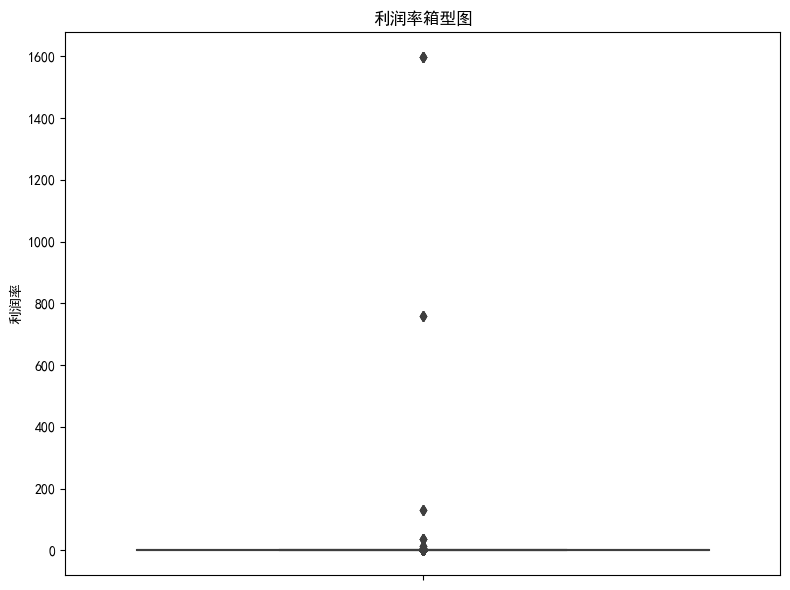

In [27]:
# 使用seaborn创建箱型图
plt.figure(figsize=(8, 6))  # 设置图形尺寸
sns.boxplot(y='利润率', data=data_1)
plt.title('利润率箱型图')
plt.ylabel('利润率')

# 显示图表
plt.tight_layout()
plt.show()

In [64]:
def cleaner(data):
    df = pd.DataFrame(data)

    # 计算利润率的四分位数
    Q1 = df['利润率'].quantile(0.25)
    Q3 = df['利润率'].quantile(0.75)
    print('下四分位数:')
    print(Q1)
    print('上四分位数:')
    print(Q3)

    # 计算IQR（四分位范围）
    IQR = Q3 - Q1

    # 定义异常值的上下边界
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 10 * IQR
    print("下边界:")
    print(lower_bound)
    print("上边界:")
    print(upper_bound)

    outliers_df = df[(df['利润率'] < lower_bound) | (df['利润率'] > upper_bound)]
    
    # 打印被删除的异常数据
    print("被删除的异常数据:")
    print(outliers_df)
    
    # 删除利润率列中的异常值
    df = df[(df['利润率'] >= lower_bound) & (df['利润率'] <= upper_bound)]
    return df

In [65]:
df = cleaner(data_1)

下四分位数:
0.3788300835654597
上四分位数:
0.5578947368421053
下边界:
0.020700777012168492
上边界:
2.3485412696085612
被删除的异常数据:
            销售日期   分类名称  销量(千克)  销售单价(元/千克)  批发价格(元/千克) 是否打折销售       利润率
1388  2020-08-14  水生根茎类   2.000         2.9        0.78      否  2.717949
1399  2020-08-14  水生根茎类   1.000         2.9        0.78      否  2.717949
1405  2020-08-14  水生根茎类   1.000         2.9        0.78      否  2.717949
1421  2020-08-14  水生根茎类   1.000         2.9        0.78      否  2.717949
1427  2020-08-14  水生根茎类   3.000         2.9        0.78      否  2.717949
...          ...    ...     ...         ...         ...    ...       ...
48261 2023-02-12  水生根茎类   0.386         6.0        0.87      否  5.896552
48271 2023-02-12  水生根茎类   0.856         6.0        0.87      否  5.896552
48294 2023-02-12  水生根茎类   0.755         6.0        0.87      否  5.896552
48302 2023-02-12  水生根茎类   0.604         6.0        0.87      否  5.896552
48305 2023-02-12  水生根茎类   0.722         6.0        0.87      否  5.896552

[121 rows x

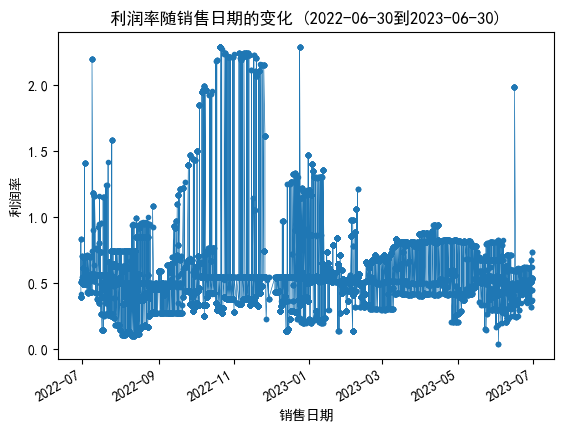

In [88]:
sales_dates = df['销售日期']
profit_rates = df['利润率']
sales = df['销量(千克)']

# 将日期字符串转换为Timestamp对象
sales_dates = pd.to_datetime(sales_dates)

# 筛选出在2022-06-30到2023-06-30之间的数据点
filtered_sales_dates = []
filtered_profit_rates = []
filtered_sales = []
for date, profit,sales in zip(sales_dates, profit_rates,sales):
    if datetime(2022,6, 30) <= date <= datetime(2023, 6, 30):
        filtered_sales_dates.append(date)
        filtered_profit_rates.append(profit)
        filtered_sales.append(sales)

# 创建折线图并调整线条粗细
plt.plot(filtered_sales_dates, filtered_profit_rates, marker='o', linestyle='-', linewidth=0.5, markersize=3)  # 调整linewidth参数以改变线条粗细

# 添加标题和标签
plt.title('利润率随销售日期的变化 (2022-06-30到2023-06-30)')
plt.xlabel('销售日期')
plt.ylabel('利润率')

# 使横轴更宽
plt.gcf().autofmt_xdate()  # 自动旋转和对齐日期标签，使横轴更宽

# 显示图表
plt.show()

In [87]:
filtered_sales_dates

[Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-30 00:00:00'),
 Timestamp('2022-06-

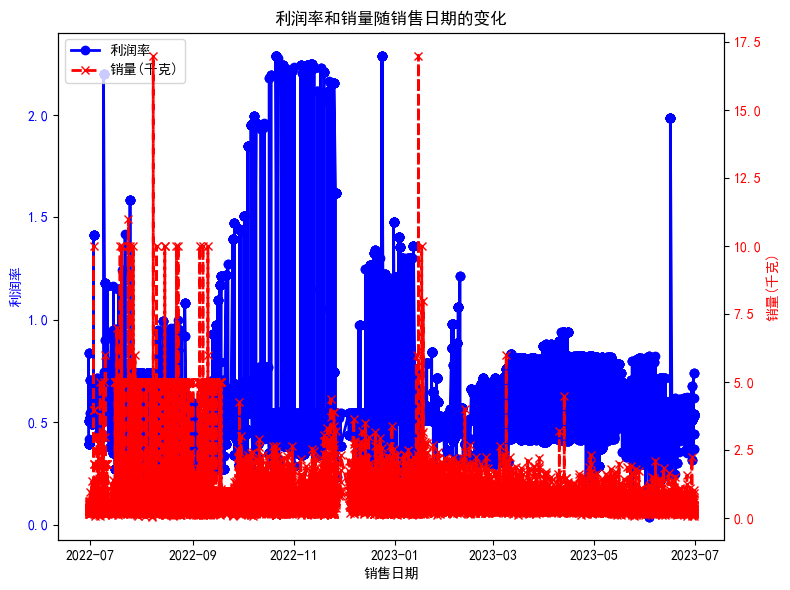

In [89]:
# 创建图形和坐标轴
fig, ax1 = plt.subplots(figsize=(8, 6))

# 绘制利润率折线图
ax1.plot(filtered_sales_dates, filtered_profit_rates, marker='o', linestyle='-', linewidth=2, label='利润率', color='b')
ax1.set_xlabel('销售日期')
ax1.set_ylabel('利润率', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建第二个坐标轴
ax2 = ax1.twinx()

# 绘制销量(千克)折线图
ax2.plot(filtered_sales_dates, filtered_sales, marker='x', linestyle='--', linewidth=2, label='销量(千克)', color='r')
ax2.set_ylabel('销量(千克)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# 设置x轴标签的旋转
plt.xticks(rotation=45)

# 添加标题
plt.title('利润率和销量随销售日期的变化')

# 显示图表
plt.tight_layout()
plt.show()

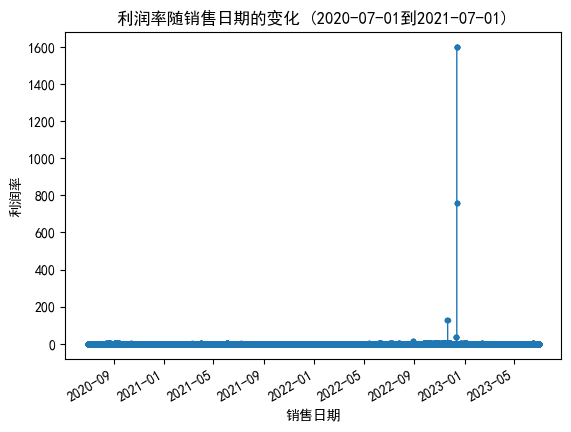

In [59]:
sales_dates = data_1['销售日期']
profit_rates = data_1['利润率']

# 将日期字符串转换为Timestamp对象
sales_dates = pd.to_datetime(sales_dates)

# 筛选出在2020-07-01到2021-07-01之间的数据点
filtered_sales_dates = []
filtered_profit_rates = []
for date, profit in zip(sales_dates, profit_rates):
    if datetime(2020, 7, 1) <= date <= datetime(2023, 6, 30):
        filtered_sales_dates.append(date)
        filtered_profit_rates.append(profit)

# 创建折线图并调整线条粗细
plt.plot(filtered_sales_dates, filtered_profit_rates, marker='o', linestyle='-', linewidth=0.5, markersize=3)  # 调整linewidth参数以改变线条粗细

# 添加标题和标签
plt.title('利润率随销售日期的变化 (2020-07-01到2021-07-01)')
plt.xlabel('销售日期')
plt.ylabel('利润率')

# 使横轴更宽
plt.gcf().autofmt_xdate()  # 自动旋转和对齐日期标签，使横轴更宽

# 显示图表
plt.show()

In [97]:
df1 = pd.DataFrame({'sales': filtered_sales, 'profit_rates': filtered_profit_rates})

In [98]:
from sklearn.linear_model import LinearRegression

# 创建线性回归模型
model = LinearRegression()

# 拟合模型
X = df1.values.reshape(-1, 1)  # 自变量
y = df1.values  # 因变量
model.fit(X, y)

# 输出回归系数和截距
print(f'回归系数 (斜率): {model.coef_[0]}')
print(f'截距: {model.intercept_}')

ValueError: Found input variables with inconsistent numbers of samples: [41464, 20732]

In [91]:
# 预测利润率
predicted_profit_rates = model.predict(X)

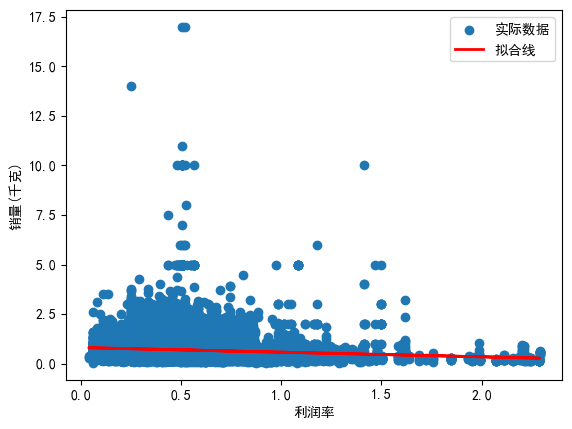

In [92]:
# 绘制散点图
plt.scatter(X, y, label='实际数据')

# 绘制拟合线性回归线
plt.plot(X, predicted_profit_rates, color='red', linewidth=2, label='拟合线')

plt.xlabel('利润率')
plt.ylabel('销量(千克)')
plt.legend()
plt.show()

In [94]:
from sklearn.metrics import r2_score
r2 = r2_score(y, predicted_profit_rates)
print(f'R²: {r2}')

R²: 0.010137722648405068


In [77]:
from sklearn.metrics import accuracy_score

# 假设您有真实标签和预测标签
true_labels = [0, 1, 1, 0, 1, 0, 1, 1, 0, 0]  # 真实标签
predicted_labels = [0, 1, 1, 0, 1, 1, 1, 0, 0, 0]  # 预测标签

# 使用accuracy_score函数计算准确率
accuracy = accuracy_score(true_labels, predicted_labels)

print(f'准确率: {accuracy:.2f}')


准确率: 0.80


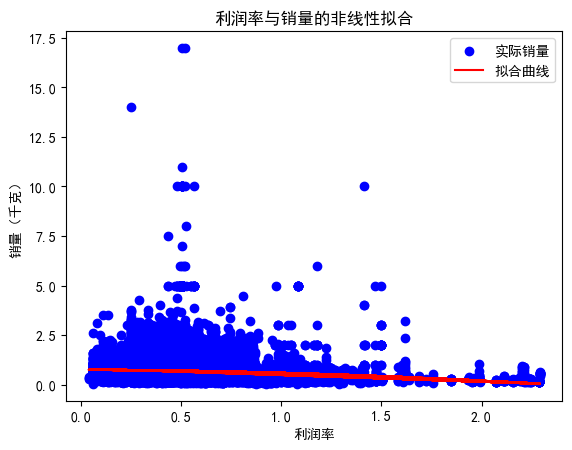

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

profit_margin = df['利润率'].values  # 自变量
sales = df['销量(千克)'].values  # 因变量

# 将自变量 X 转换为二维数组
X = profit_margin[:, np.newaxis]

# 创建多项式回归模型，这里使用二次多项式
degree = 2  # 可以根据需要选择多项式的次数
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X, sales)

# 预测销量
sales_pred = polyreg.predict(X)

# 绘制拟合曲线
plt.scatter(X, sales, label='实际销量', color='blue')
plt.plot(X, sales_pred, label='拟合曲线', color='red')
plt.xlabel('利润率')
plt.ylabel('销量（千克）')
plt.legend()
plt.title('利润率与销量的非线性拟合')
plt.show()

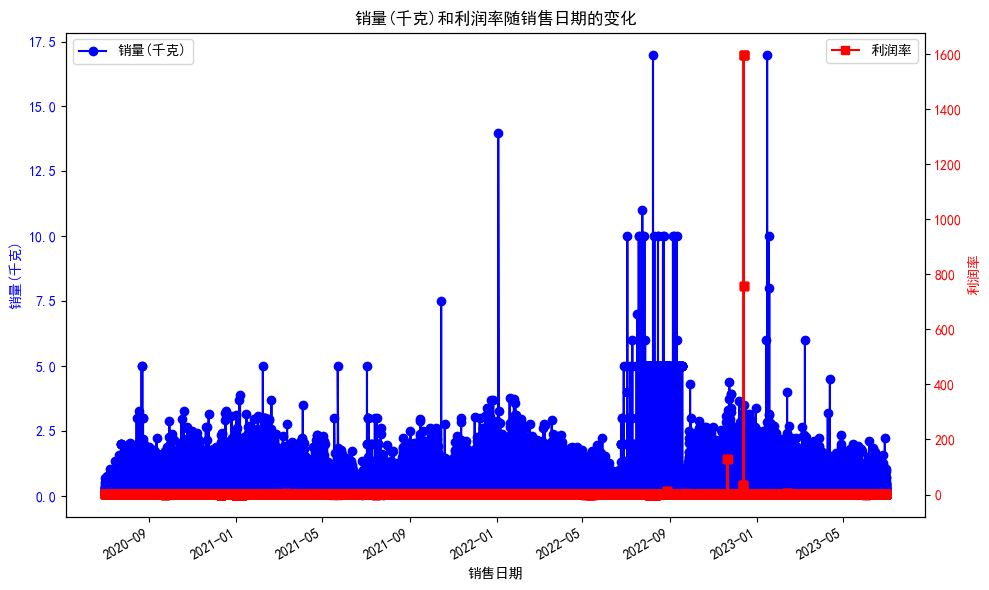

In [69]:
# 将销售日期转换为日期对象
data_1['销售日期'] = pd.to_datetime(data_1['销售日期'], format='%Y-%m-%d')

# 创建画布和第一个坐标轴
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制销量(千克)的折线图
ax1.plot(data_1['销售日期'], data_1['销量(千克)'], color='b', marker='o', label='销量(千克)')
ax1.set_xlabel('销售日期')
ax1.set_ylabel('销量(千克)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# 创建第二个坐标轴并共享x轴
ax2 = ax1.twinx()

# 绘制利润率的折线图
ax2.plot(data_1['销售日期'], data_1['利润率'], color='r', marker='s', label='利润率')
ax2.set_ylabel('利润率', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

# 添加标题
plt.title('销量(千克)和利润率随销售日期的变化')

# 自动旋转和对齐日期标签，使横轴更宽
plt.gcf().autofmt_xdate()

# 显示图表
plt.tight_layout()
plt.show()